**处理FITS格式的图像、表格和header**  
@Time: 2022.09.16  
@Author: Ray  
@Cite: 
1. [docs](https://docs.astropy.org/en/stable/io/fits/index.html#reading-and-updating-existing-fits-files)
2. [astropy.io.fits FAQ](https://docs.astropy.org/en/stable/io/fits/appendix/faq.html#io-fits-faq)

> FITS文件简介
* `FITS(Flexible Image Transport System)`是一种广泛用于天文领域的文件标准，用于存贮`images`和`tables`
* HDU (Header Data Unit)是FITS文件的基本结构单元，由header和data array(image)或table组成
* HDUList是HDU的列表，其中每一个元素都是HDU，每个HDU称为该FITS文件的一个扩展(extension)

---
## 打开FITS文件
* 可以直接打开FITS的压缩文件<>.fits.gz

In [1]:
# 加载实验文件
from astropy.io import fits
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
print(fits_image_filename)

/Users/rui/miniconda3/envs/astro/lib/python3.10/site-packages/astropy/io/fits/tests/data/test0.fits


In [2]:
hdul = fits.open(fits_image_filename)  # 打开一个FITS文件，详细参数说明见文档
hdul.info()  # * 查看hdul的信息; 可见该FITS有4个同名（SCI）的扩展
fits.info(fits_image_filename)  # * 不读取FITS，直接查看info
# hdul.close()  # 关闭FITS文件，一般不用关闭

Filename: /Users/rui/miniconda3/envs/astro/lib/python3.10/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   
Filename: /Users/rui/miniconda3/envs/astro/lib/python3.10/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


In [3]:
print(hdul['SCI'].header['EXTVER']) # ! 如果使用扩展名索引，同名时默认选择第一个
print(hdul[1].header['EXTVER'])  # 使用数字索引扩展
print(hdul[1].header.comments['EXTVER'])

1
1
extension version number


In [4]:
print(hdul['SCI', 3].header['EXTVER']) # 同名扩展可以指定序号
print(hdul[3].header['EXTVER'])  # 使用数字索引扩展

3
3


---
## FITS Header
* header的每一行称为一个`card`，包含keyword, value, comment

### 提取header

In [5]:
header= hdul[0].header # 提取header

### 获取header的关键字

In [6]:
list(header.keys())[:10] # 显示前10个关键字

['SIMPLE',
 'BITPIX',
 'NAXIS',
 'EXTEND',
 'GROUPS',
 'NEXTEND',
 'BSCALE',
 'BZERO',
 'ORIGIN',
 'DATE']

### 索引value in a card

In [7]:
hdul[0].header['DATE'] # 输入header中某个关键字，获取其值

'01/04/99'

In [8]:
print(header[25])  # 也可以使用数字索引，注意索引是行号-1
print(header['FILETYPE'])

SCI
SCI


### 索引comment in a card

In [9]:
header.comments['FILETYPE']

'shp, ext, edq, sdq, sci'

### 添加或修改card
* 原来没有则添加，原来就有则修改
* 另外一种[编辑header的方法](https://docs.astropy.org/en/stable/generated/examples/io/modify-fits-header.html#sphx-glr-generated-examples-io-modify-fits-header-py)

In [10]:
# 方法1: 字典一样的赋值
header['targname'] = 'NGC121-a'
print(header['targname'])

NGC121-a


In [11]:
# 同时添加注释, 格式`(value, comment)`
header['targname'] = ('NGC121-a', 'the observation target')
print(header.comments['targname'])

the observation target


In [12]:
print(f"修改前: {header['FILETYPE']}")
header['FILETYPE'] = ('test', 'before if SCI')  # 修改已经存在的关键字，
print(f"修改后: {header['FILETYPE']}")
print(header.comments['FILETYPE'])

修改前: SCI
修改后: test
before if SCI


In [13]:
# 方法2: set()方法
# 在card<DATE>前面添加新的card
header.set(keyword='observer', value='Ray', comment='just for test', before='DATE')

### 添加或修改`COMMENT` or `HISTORY` cards
* `COMMENT` or `HISTORY` cards不同于正常的card

In [14]:
header['history'] = 'Ray updated this file 2022.09.16'
header['comment'] = 'This is a test comment'
header[''] = 'I like HST'  # 无关键字的card，设置显著的注释

### 打印header
* 直接print，会乱码，可以使用这个方法

In [15]:
print(repr(header))

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
GROUPS  =                    F / data has groups                                
NEXTEND =                    4 / Number of standard extensions                  
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel Aug 1 1997' / FITS file originator       
OBSERVER= 'Ray     '           / just for test                                  
DATE    = '01/04/99  '         / Date FITS file was generated                   
IRAF-TLM= 'xxx     '              / Time of last modification                   
                            

---
## FITS for Image

In [16]:
hdul.info()

Filename: /Users/rui/miniconda3/envs/astro/lib/python3.10/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


### 图像数据以numpy数组形式存储
* 因此numpy的数组操作都可以用于操作图像

In [17]:
data = hdul[1].data  # 提取图像数据
print(data)
print(f"==> 查看数组的维度: {data.shape}")
print(f"==> 查看数组的数据类型: {data.dtype.name}")

[[313 312 313 ... 312 313 313]
 [315 315 313 ... 312 314 313]
 [313 313 312 ... 314 312 313]
 ...
 [314 313 312 ... 312 313 311]
 [313 315 312 ... 313 313 312]
 [312 314 314 ... 314 311 314]]
==> 查看数组的维度: (40, 40)
==> 查看数组的数据类型: int16


### counts转换为flux
* data数据记录的是图像的counts，而我们需要得到物理的flux
* 从header中提取photflam和exptime进行计算即可

In [18]:
photflam = hdul[1].header['PHOTFLAM']  # ! 示例的photflam可能有问题
exptime = hdul[0].header['EXPTIME']
print(f"{hdul[1].header.comments['PHOTFLAM']} : {photflam}")
flux = data * photflam / exptime

Inverse Sensitivity : 0.0


### FITS图像实战
* cite: https://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html#sphx-glr-generated-examples-io-plot-fits-image-py

In [19]:
import matplotlib.pyplot as plt
# ^ 使用astropy自带的风格进行画图
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

# 加载示例图像
from astropy.utils.data import get_pkg_data_filename
image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
print(f"文件下载到 ==> {image_file}")

from astropy.io import fits
fits.info(image_file)

文件下载到 ==> /Users/rui/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
Filename: /Users/rui/.astropy/cache/download/url/ff6e0b93871033c68022ca026a956d87/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


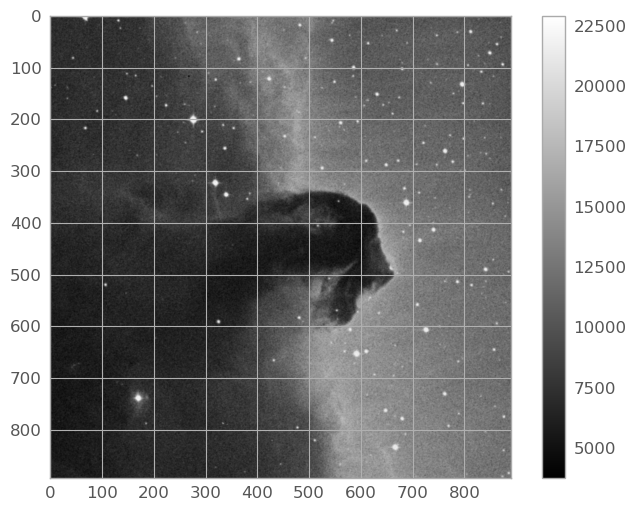

In [20]:
image_data = fits.getdata(image_file, ext=0)

plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

###  像素在数组和图像上的位置
* 该示例证明：数组的索引和图像的(x, y)一一对应，即data[0, 0] = Value(0, 0)

In [21]:
import numpy as np
data = np.array([
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]
])
print(data)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


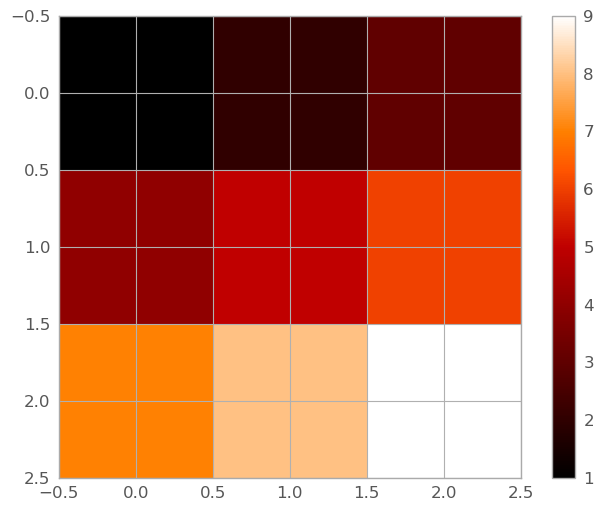

In [22]:
plt.figure()
plt.imshow(data)
plt.colorbar()

---
## FITS for table  
* 推荐直接使用`astropy.table`的`Table.read()`函数读取FITS表格并转换为table进行操作
* 这里只介绍一些基础操作

In [23]:
# 加载实验表格
fits_table_filename = fits.util.get_testdata_filepath('tb.fits')
hdul = fits.open(fits_table_filename)
hdul.info()

# 偷偷地先预览一下数据长啥样
from astropy.table import Table
Table.read(fits_table_filename)

Filename: /Users/rui/miniconda3/envs/astro/lib/python3.10/site-packages/astropy/io/fits/tests/data/tb.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      11   ()      
  1                1 BinTableHDU     24   2R x 4C   [1J, 3A, 1E, 1L]   


c1,c2,c3,c4
int32,bytes3,float64,bool
1,abc,3.7,0
2,xy,6.7,1


### `.data`属性获取表格数据

In [24]:
data = hdul[1].data  # 得到一个类似列表的object，其中每一个元素是一个元组，是一行数据
data

FITS_rec([(1, 'abc', 3.70000007,  0), (2, 'xy', 6.69999971,  1)],
         dtype=(numpy.record, [('c1', '>i4'), ('c2', 'S3'), ('c3', '>f4'), ('c4', 'i1')]))

### 获取一行数据

In [25]:
data[0]

(1, 'abc', 3.7000000715255736, False)

### 获取一列数据

In [26]:
# 方法1: 列名索引
data['c1']

array([1, 2], dtype=int32)

In [27]:
# 方法2: field方法
print(data.field(0)) # 数字索引第0列
print(data.field('c2'))

[1 2]
['abc' 'xy']


### 获取一个数据

In [28]:
data.field('c2')[0]  # 获取第0行，列名c1的数据

'abc'

### 查看数据表的列信息

生成列对象ColDefs

In [29]:
cols = data.columns
cols

ColDefs(
    name = 'c1'; format = '1J'; null = -2147483647; disp = 'I11'
    name = 'c2'; format = '3A'; disp = 'A3'
    name = 'c3'; format = '1E'; bscale = 3; bzero = 0.4; disp = 'G15.7'
    name = 'c4'; format = '1L'; disp = 'L6'
)

In [30]:
hdul[1].columns  # * 直接对hdu操作也可以

ColDefs(
    name = 'c1'; format = '1J'; null = -2147483647; disp = 'I11'
    name = 'c2'; format = '3A'; disp = 'A3'
    name = 'c3'; format = '1E'; bscale = 3; bzero = 0.4; disp = 'G15.7'
    name = 'c4'; format = '1L'; disp = 'L6'
)

详细列信息

In [31]:
cols.info()

name:
    ['c1', 'c2', 'c3', 'c4']
format:
    ['1J', '3A', '1E', '1L']
unit:
    ['', '', '', '']
null:
    [-2147483647, '', '', '']
bscale:
    ['', '', 3, '']
bzero:
    ['', '', 0.4, '']
disp:
    ['I11', 'A3', 'G15.7', 'L6']
start:
    ['', '', '', '']
dim:
    ['', '', '', '']
coord_type:
    ['', '', '', '']
coord_unit:
    ['', '', '', '']
coord_ref_point:
    ['', '', '', '']
coord_ref_value:
    ['', '', '', '']
coord_inc:
    ['', '', '', '']
time_ref_pos:
    ['', '', '', '']


列名列表

In [32]:
cols.names

['c1', 'c2', 'c3', 'c4']

## 对比两个FITS文件的区别
* https://docs.astropy.org/en/stable/io/fits/api/diff.html#headerdiff